# Logistic Regression and Classification 

## One of the fundamental goals in data analysis is to develop models that can make predictions about future (unseen) data.
## One of these types of models in a **classifier**. 

## Classification

### Classification, is an area of supervised learning that addresses the problem of how to systematically assign unlabeled (**classes** unknown) novel data to their labels (**classes** or groups or types) by using knowledge of their **features** (characteristics or attributes) that are obtained from observation and/or measurement.
### A classifier algorithm is a specific technique or method for performing classification.
### To learn to classify, the classifier algorithm first uses labeled (classes are known) training data to train a model (i.e., fit parameters), and then it uses a function known as its classification rule (or for short, the **classifier**) to assign a label to each new data point given the feature values.
### A simple measure of classification performance is **accuracy**, that is what fraction of the new data is labeled accurately. 

## The automated checkout problem 

![](images/pepperfeature.png)
![](images/peppertest.png)

## The intuitive importance of Classification
### In conventional statistics courses, and experimental psychology or neuroscience courses, emphasis is placed on the notion of finding a \textit{significant} difference between two (or more) subject groups or experimental conditions.  

### For example in clinical research we ask questions such as - **Is the patient data different than the control data?**
### But in our minds (and definitely in the patient and in the physicians mind) perhaps we should ask a different question - 
## **Based on the characteristics of the patients data, can we determine if the data comes from a patient or a control?**
### The first approach is built around hypothesis testing for differences, the second approach is classification of data.


## What is a Classifier?
### At the simplest level a Classifier is a decision rule, that allows us to categorize data. 

### For example, when you go to the doctor they take your blood pressure, and you get a pair of numbers like 120/80 for the systolic/diastolic pressure. 

### The doctor has a decision rule.  If the systolic pressure is above 130, the patient receives a stern lecture about diet and exercise, and if the systolic pressure is above 140, medication is prescribed to lower blood pressure.  

### Thus, there are 3 classes of patients based on the systolic blood pressure reading.
1. #### < 130 - healthy
1. #### 130-140 - borderline 
1. #### > 140. - medication 

### **This is a classifier** 

### How were these critical values found?  Hopefully, huge amounts of data are collected to look at patient cardiovascular health and blood pressure, and the data says if blood pressure remains above 140, the heart walls thicken and secondary cardiovascular diseases can emerge.   (There are other bad effects too).  

### Examples in Cognitive Science/Cognitive Neuroscience
1. ### Categorization 
2. ### Automatic Speech Recognition
3. ### Face Recognition
4. ### Brain-Computer Interfaces
5. ### Biomarkers for Mental Health 
6. ### Single-trial analysis of Neural Signals 

### In data science/machine learning applications, we are solely interested in making classifiers work as accurately as possible. 
### In scientific applications, we want to know how the classifier was able to work.  We want to know what features of the data were useful and what transformations of the data produced the accurate classification. 

## Logistic Regression 

###  The first classifier we will discuss in this class is (seemingly oddly) named Logistic Regression. 
###  In Linear Regression, we fit a line to data. 
###  In Logistic Regression we will fit a curve to the probability that the data comes from one **class**

### Courtesy of Wikepidia By Canley - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=116449187
![](images/Exam_pass_logistic_curve.svg.png)

## Diabetes Prediction Example 
[Pima Indians Diabetes Study](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
##NEW IMPORTS
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [79]:

#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("data/diabetes.csv")

In [80]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [81]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [82]:
#I grabbed a list of all the columns 
cols = pima.columns

In [83]:
#Examine how many of each outcome
pima["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [84]:
#Examine what the number of pregnancies distribution looks like 
pima["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [85]:
#Split the data into the predictors and Outcome Variable 

diabetes = pima['Outcome']
predictors = pima[cols[1:8]]

## One of the most important things to do is to examine the correlations among your predictors. 

<Axes: >

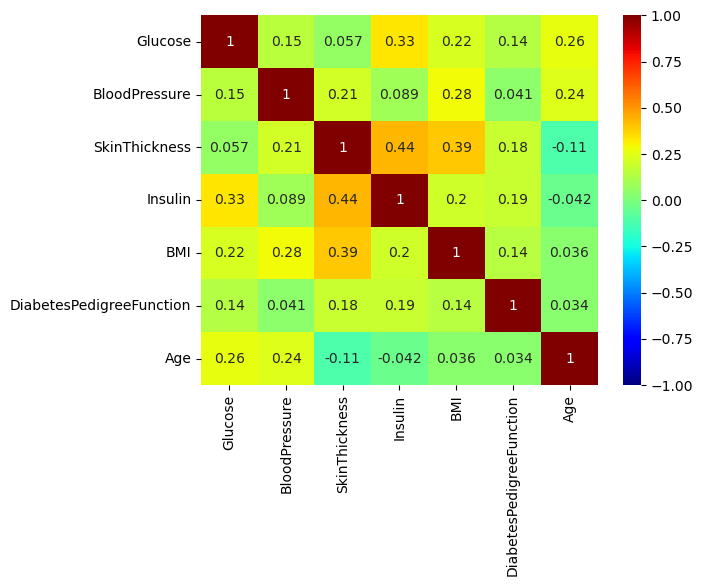

In [86]:
sns.heatmap(predictors.corr(), vmin=-1, vmax=1, cmap= "jet",annot=True)

/home/ramesh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


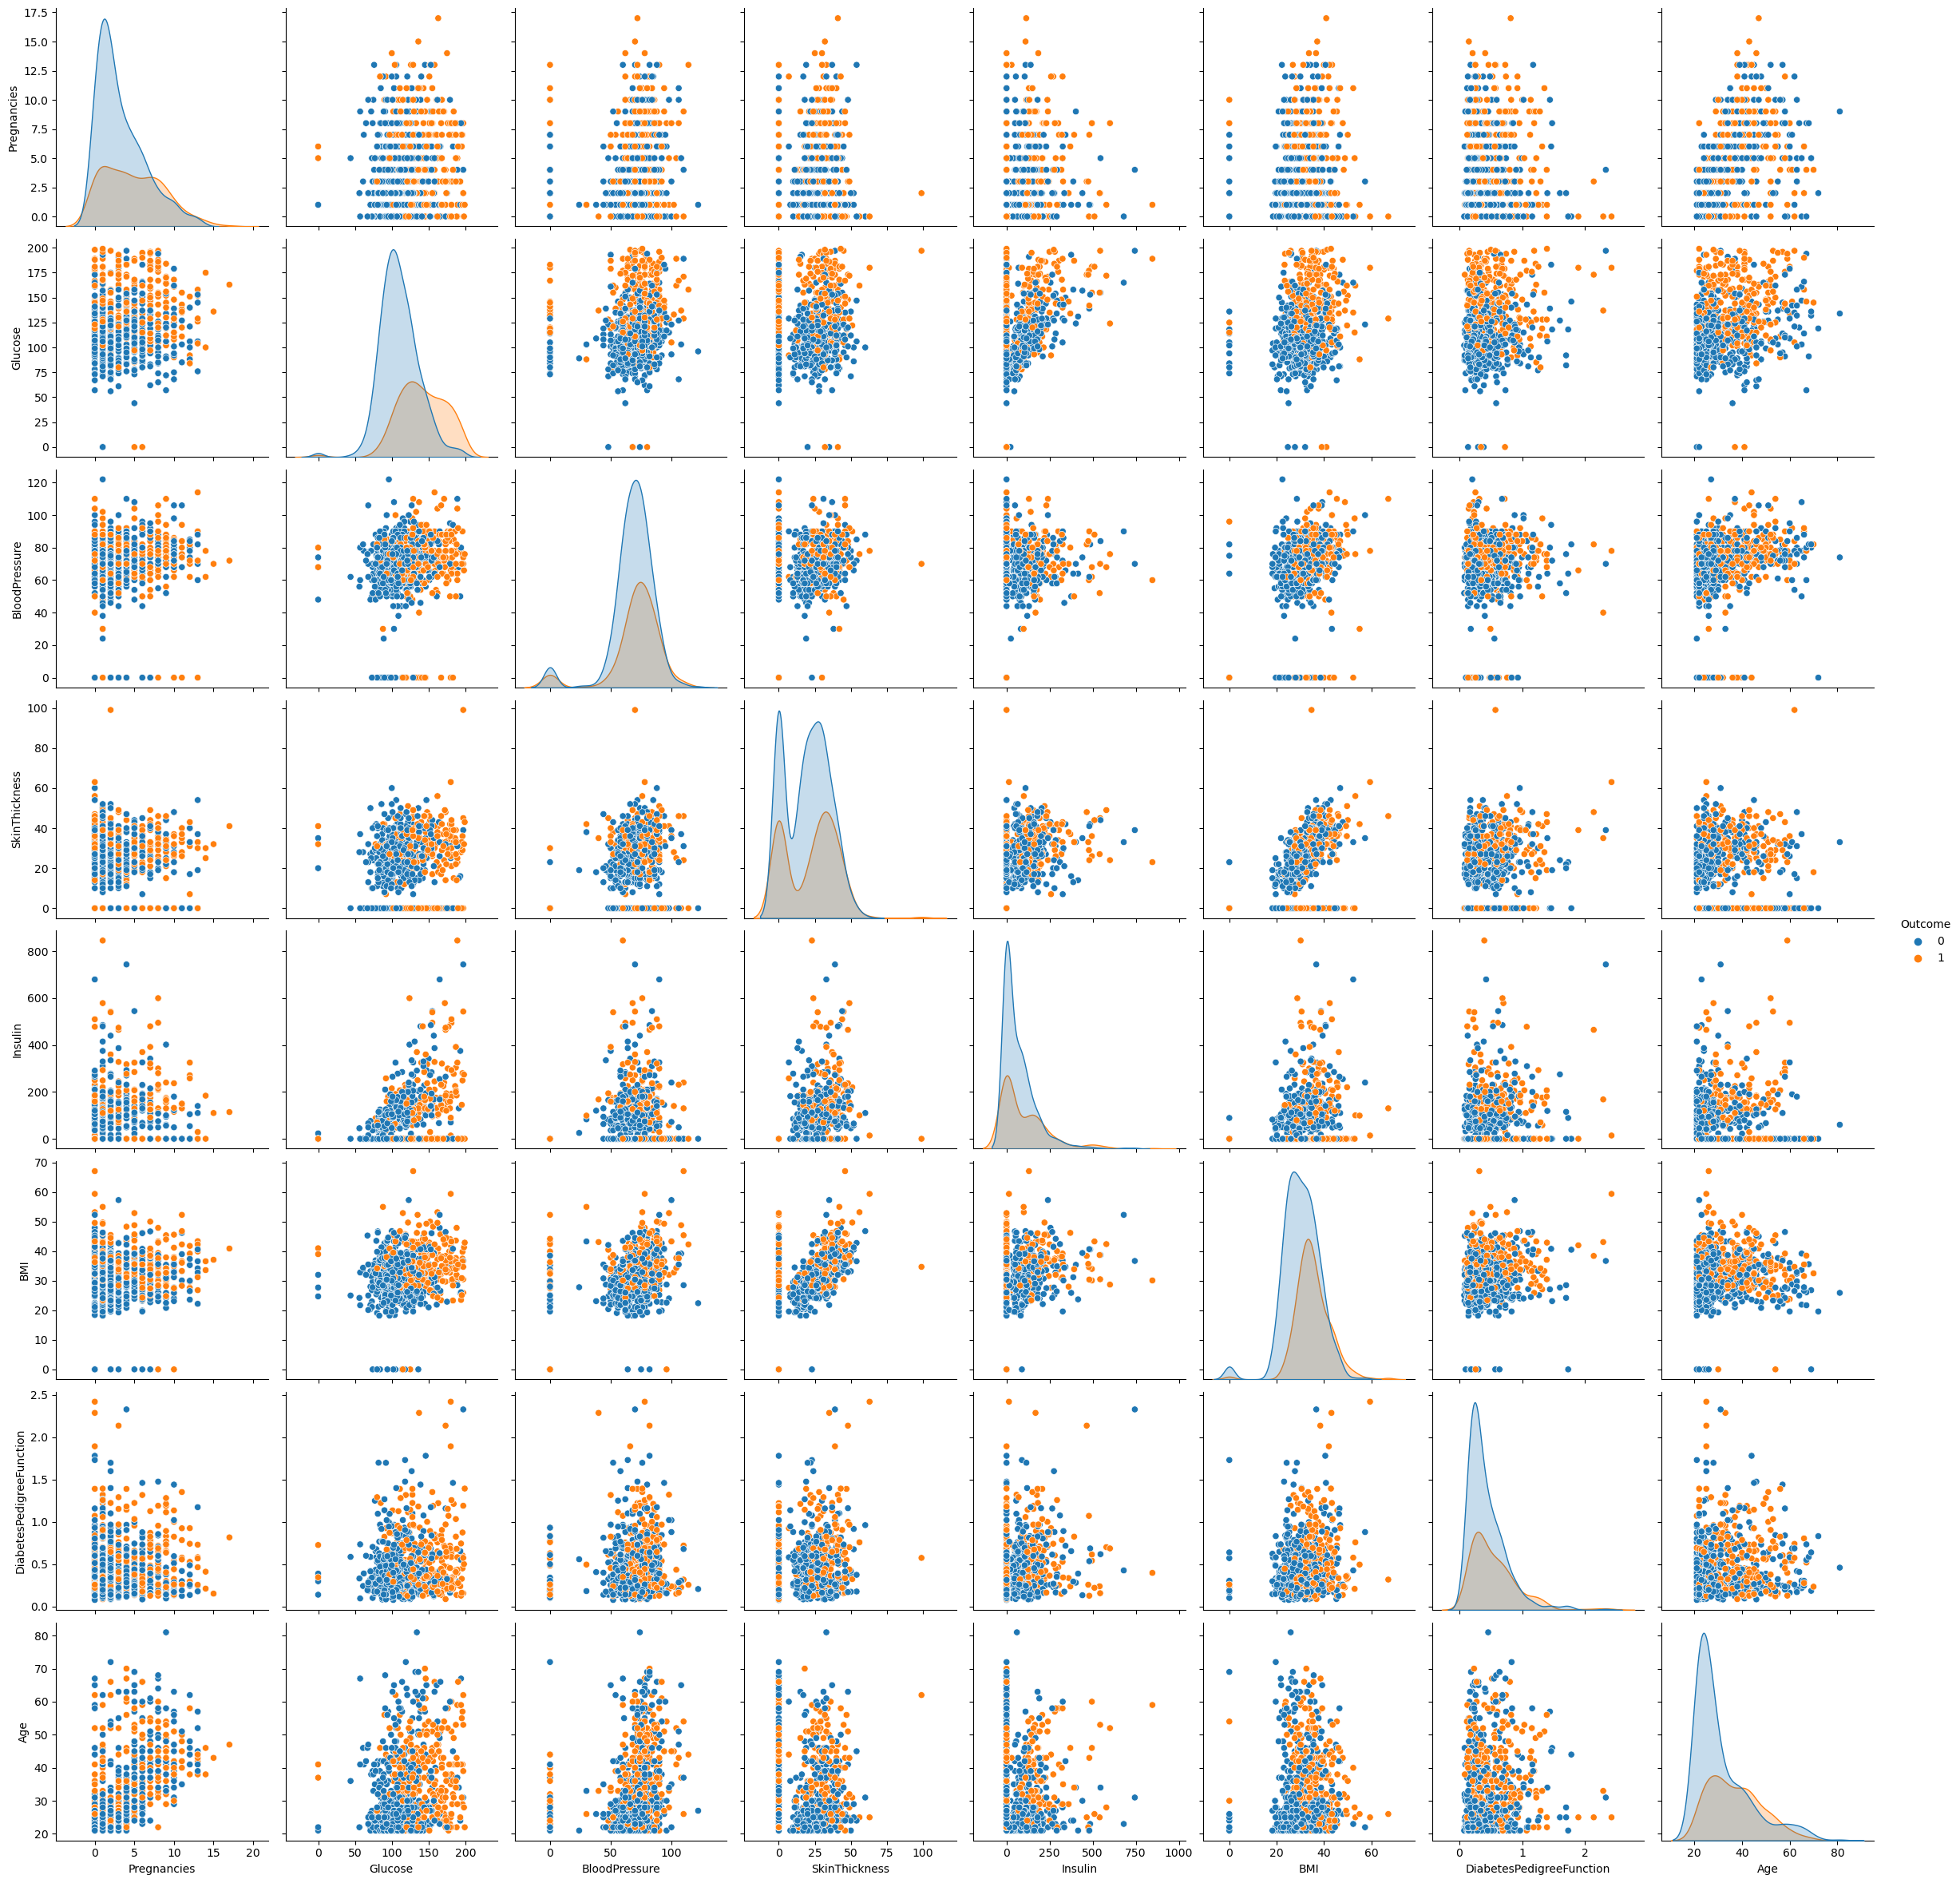

In [87]:
sns.pairplot(pima, hue="Outcome", size=3);

## CROSS-VALIDATION

### This is one of the most important parts of ANY modeling exercise.  
### Machine-learning folks call it **cross-validation**
### Statistics people call it **out-of-sample prediction**

### The purpose of developing a model is to be able to make predictions about new data.
### We dont want to wait to collect new data to know of our model is likely to work. 
### So, instead, we split our data into **test** and **training** data sets. 
### We will train the model only using the training data, and then evaluate the model performance on the test data. 

In [88]:
# split X and y into training and testing sets
#Here I made the decision to make the test size 25% of the data and trainign 75%
#random state is the seed of the random number generator allowing you to generate 
# a different split. 
#Since we are making 1 split of the data this is called a 1-fold cross-validation. 
#predictors_train has the training data features 
#predictors_test has the testing data features
#diabetes_train has the training data outcomes (targets)
#diabetes_test has the testing data outcomes (targets)
from sklearn.model_selection import train_test_split

predictors_train, predictors_test, diabetes_train, diabetes_test = train_test_split(predictors, diabetes, test_size=0.25, random_state=16)

## It is so easy to do this its embarassing these data science people make so much money. 

In [89]:
# instantiate the model (using the default parameters, escept random_state and max_iter)
logreg = LogisticRegression(random_state=16,max_iter = 5000)

# fit the model with data
logreg.fit(predictors_train, diabetes_train)

diabetes_pred = logreg.predict(predictors_test)

In [90]:
print(diabetes_pred)

[1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 0 0 0 0 1 1]


In [91]:
#Lets see if the predictions match the expected outcomes 
correct = (diabetes_pred==diabetes_test)
ncorrect = np.sum(correct)
pctcorrect = 100*ncorrect/len(diabetes_test)
print(pctcorrect)

79.16666666666667


## A confusion matrix is a really nice way to summarize the performance of a classifer. 

In [92]:
cnf_matrix = metrics.confusion_matrix(diabetes_test, diabetes_pred)
print(cnf_matrix)

[[113  12]
 [ 28  39]]


([<matplotlib.axis.YTick at 0x7fc66a19fc50>,
 [Text(0, 0.5, 'Undiagnosed'), Text(0, 1.5, 'Diabetes')])

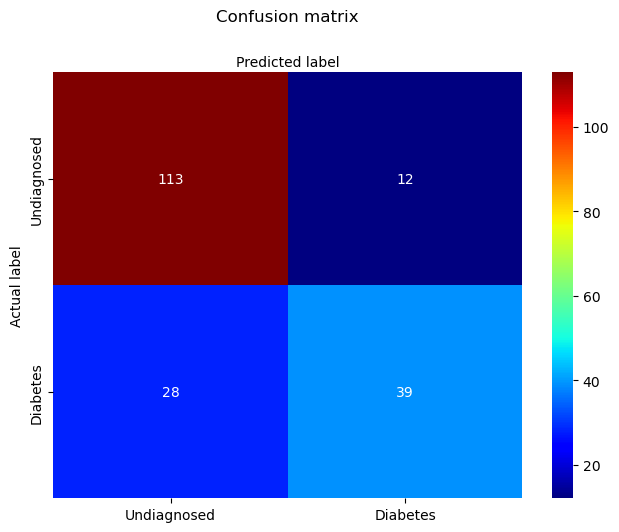

In [93]:
#Never say '"Healthy", "Normal", just say "Undiagnosed"
class_names=['Undiagnosed','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)


#Text(0.5,257.44,'Predicted label');

In [94]:
## you can also get this as a report 
print(metrics.classification_report(diabetes_test,diabetes_pred,target_names=class_names))


              precision    recall  f1-score   support

 Undiagnosed       0.80      0.90      0.85       125
    Diabetes       0.76      0.58      0.66        67

    accuracy                           0.79       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.79      0.79      0.78       192



### Precision - What proportion of postive identifications were actually correct
### $$ Precision = \frac{TP}{TP+FP}$$ 
### TP = True Positive
### FP = False Positive
### TN - True Negative 
### FN - False Negative  
### Recall - What proportion of actual positive was identified correctly? 
### $$ Recall = \frac{TP}{TP+FN}$$




## Diagnostic Information 

### The strength of linear methods like logistic regression is that they can provide rich insight into the performance of the model. 
 

In [95]:
diabetes_pprob = logreg.predict_proba(predictors_test)

<Axes: ylabel='Count'>

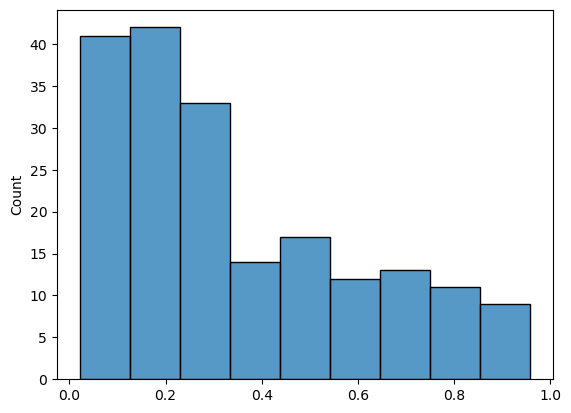

In [96]:
sns.histplot(diabetes_pprob[:,1])

### The prediction probability is a confidence estimate on the prediction.  

![](images/PrecisionVsRecallBase.png)

Text(0, 0.5, 'Probability of Diabetes')

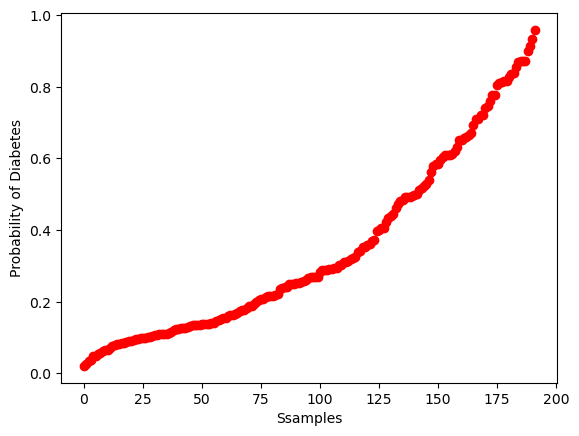

In [97]:
plt.plot(np.sort(diabetes_pprob[:,1]),'ro')
plt.xlabel('Ssamples')
plt.ylabel('Probability of Diabetes')

## ROC Curve 
### Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

### An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

    ### True Positive Rate
    ### False Positive Rate

### True Positive Rate (TPR) is the same as recall in metrics and is therefore defined as follows:

$$TPR = \frac{TP}{TP+FN}$$

### False Positive Rate (FPR) is defined as follows:

$$FPR = \frac{FP}{FP+TN}$$

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives

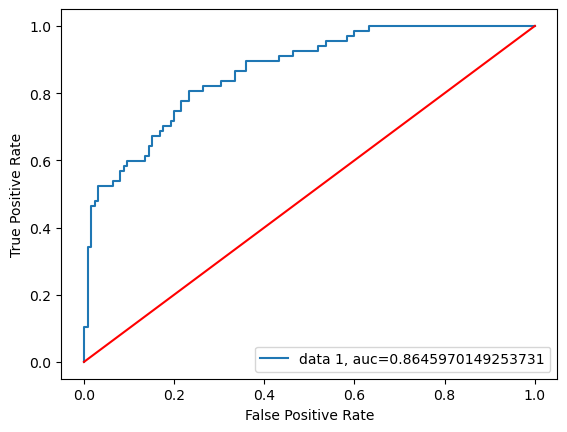

In [98]:
fpr, tpr, _ = metrics.roc_curve(diabetes_test,  diabetes_pprob[:,1])
auc = metrics.roc_auc_score(diabetes_test, diabetes_pprob[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r-')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## We can also (potentially) learn from these models which features were most useful in making the prediction. 

In [99]:
model = pd.DataFrame(logreg.coef_,columns = cols[1:8])

In [100]:
model.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.032094,-0.014297,0.003797,-0.001688,0.087447,0.764801,0.027721


### We need to think about units!  

### Imagine the simple case where we have only a 2 class classification problem: 
### The logistic regression formula can be written as: 

### $$\hat{p}= \dfrac{e^{w^T x}}{1+e^{w^T x}}$$

### $$\hat{p}= \dfrac{1}{1+e^{-w^T x}}$$

### where w are the weights that we can return and x are out features

### The decision boundaries are exactly at the position where our algorithm "hesitates" when predicting which class to classify. The boundary decision probability is exactly 0.5. Solving our sigmoid function for $p=0.5$:

$$\hat{p}= \dfrac{1}{1+e^{-w^T x}} = 0.5 =  \dfrac{1}{1+1} $$

$$ e^{-w^T x} = 1$$

$$ -w^T x = 0$$

$$ w^T x = 0$$

### This is why logistic regression is a linear model, even though the function is clearly not a line. 

### How to scale data. 
### There are several options. 
### From `scipy`` use `zscore``. 
### 

$$ z = \frac{(x-\mu)}{\sigma} $$

### From sklearn use StandardScaler

In [101]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() #This initializes the StandardScaler 
predictors_scaled = pd.DataFrame(ss.fit_transform(predictors),columns = predictors.columns)

In [102]:
predictors_scaled.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [103]:
predictors_train, predictors_test, diabetes_train, diabetes_test = train_test_split(predictors_scaled, diabetes, test_size=0.25, random_state=16)

In [104]:
# instantiate the model (using the default parameters, escept random_state and max_iter)
logreg = LogisticRegression(random_state=16,max_iter = 5000)

# fit the model with data
logreg.fit(predictors_train, diabetes_train)

diabetes_pred = logreg.predict(predictors_test)

In [105]:
print(metrics.classification_report(diabetes_test,diabetes_pred,target_names=class_names))


              precision    recall  f1-score   support

 Undiagnosed       0.80      0.90      0.85       125
    Diabetes       0.76      0.58      0.66        67

    accuracy                           0.79       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.79      0.79      0.78       192



In [106]:
model = pd.DataFrame(logreg.coef_,columns = cols[1:8])

In [107]:
model.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.010082,-0.268121,0.055471,-0.188191,0.677139,0.276936,0.322572


## To be able to interpret the importance of different features in a logistic regression model, you must use the StandardScaler() or zscore.  Doing so will not affect your model performance.  It will make your coefficients more interpretable.  

## K-fold cross validation 

## Currently, we are doing a test-training set split of the data. Another (better?) option is k-fold cross validation. 

In [108]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2, random_state=20, shuffle=True) # 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

  Train: index=[2 3]
  Test:  index=[0 1]
  Train: index=[0 1]
  Test:  index=[2 3]


In [110]:
diabetes_kfold_pred = np.zeros(len(diabetes))
kf = KFold(n_splits=5, random_state=20, shuffle=True) #
predictors = np.array(predictors)
diabetes = np.array(diabetes)
for train_index, test_index in kf.split(predictors):
    logreg.fit(predictors[train_index,:], diabetes[train_index])
    diabetes_kfold_pred[test_index] = logreg.predict(predictors[test_index])
    

In [111]:
print(metrics.classification_report(diabetes,diabetes_kfold_pred,target_names=class_names))

              precision    recall  f1-score   support

 Undiagnosed       0.79      0.88      0.83       500
    Diabetes       0.71      0.55      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



In [ ]:
diabetes